In [1]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import random as rd

In [17]:
def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        if et[t]<0:
            et[t]=0
        elif et[t]>=0:
            et[t]=1
        b=0

    return et

In [1]:
#计算early-time-exponent
L = 512
T = 10000
re = 10
W = np.zeros(T)
A=ffgn(0,T)

for times in range(re):
    h = np.zeros(L, dtype=int)
    w = np.array([])
    for t in range(T):
        i = rd.randint(0, L-1)
        if i==0:
            h[i] = max(h[L-1], h[i]+1, h[i+1])
        elif i==L-1:
            h[i] = max(h[i-1], h[i]+1, h[0])
        else: 
            h[i] = max(h[i-1], h[i]+1, h[i+1])
        wt = np.std(h)
        w = np.append(w, wt)
    W=W+w
        
W = W/re
xlog = np.log10 (np.arange(1, T+1))
ylog = np.log10 (W)

plt.plot (xlog, ylog,label='original data')
plt.title('BD 1+1')  
plt.ylabel("log10 W")
plt.xlabel("log10 t")
plt.show()


NameError: name 'np' is not defined

β = 0.2937312612651692


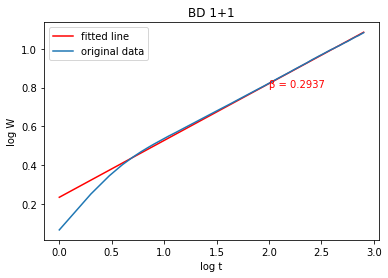

In [39]:
res = stats.linregress(xlog, ylog)
x=np.array(xlog)
plt.plot(x, res.intercept + res.slope*x, color='r', label='fitted line',)
plt.annotate("β = 0.2937",xy=(2,0.8),color='r')
print('β =',res.slope)        
plt.plot (xlog, ylog,label='original data')
plt.title('BD 1+1')  
plt.ylabel("log W")
plt.xlabel("log t")
plt.legend()
    

In [41]:
#对粗糙度进行标准差归一化
W1=(W-np.mean(W))/np.std(W)

In [3]:
len(W)

NameError: name 'W' is not defined

In [1]:
# Create a list or array with your data points 
data = W1
# Calculate the skewness 
skew = np.mean((data - np.mean(data))**3)/np.std(data)**3 
# Calculate the kurtosis 
kurt = np.mean((data - np.mean(data))**4)/np.std(data)**4  
print(skew,kurt)

NameError: name 'W1' is not defined

In [ ]:
import numpy as np 
# Create a list or array with your data points 
data = h
# Calculate the skewness 
skew = np.mean((data - np.mean(data))**3)/np.std(data)**3 
# Calculate the kurtosis 
kurt = np.mean((data - np.mean(data))**4)/np.std(data)**4  
print(skew,kurt)

In [160]:
#W的概率密度图
W_pdf=stats.norm.pdf(W,loc=np.mean(W), scale=np.std(W))
W1_pdf=stats.norm.pdf(W1,loc=np.mean(W1), scale=np.std(W1))
len(W1_pdf)

300

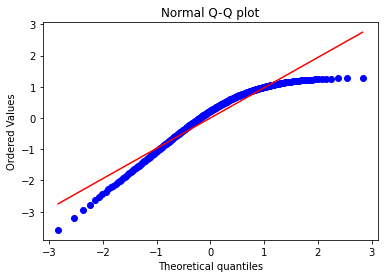

In [19]:
#Q-Q plot
from scipy import stats
stats.probplot(W1, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.y
plt.show()

/Users/zichen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


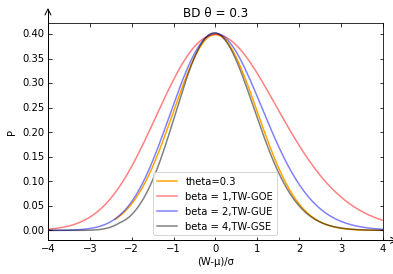

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import mpl_toolkits.axisartist as axisartist


fig = plt.figure()

# 不想要Demo中的这个样式，实验结果是去掉了灰色网格背景
#plt.style.use('ggplot')

# 创建一个绘图区对象，用于调整坐标轴
ax = axisartist.Subplot(fig,111)
# 添加绘图区对象到画布中，这里没报错很神奇，不理解，无限套娃？
fig.add_axes(ax)
# 坐标轴加上方向箭头
ax.axis["bottom"].set_axisline_style("->", size = 1.5)
ax.axis["left"].set_axisline_style("->", size = 1.5)

# 本次需求的核心代码，seaborn.distplot()用于绘制直方图、概率密度/核密度曲线、拟合曲线。
## 其中 rn1 是输入数据，是一个list或一个np的narray对象；
## hist=True/False，是否绘制直方图，可以添加hist_kws={}，进行详细设置，不在需求内，不赘述；
## kde=True/False，是否绘制核密度曲线，可以添加kde_kws={},进行详细设置，实际使用时，概率密度曲线常使用拟合曲线表示，不赘述；
## fit=stats.norm，拟合模型，一般是正态分布，norm/stats.norm都可以，可以添加fit_kws={}进行消息设置，
### fit_kws={'color':'拟合曲线颜色','label':'图例说明','linestyle':'曲线样式'}
plot=sns.distplot(-W1,hist=False,kde=False, fit=stats.norm, fit_kws={'color':'orange', 'label':'theta=0.3','linestyle':'-'})
plt.plot(x,pdf1*1.25, color = "red", alpha = 0.5, label=r"beta = 1,TW-GOE")
plt.plot(x,pdf2*0.9, color = "blue", alpha = 0.5, label=r"beta = 2,TW-GUE")
plt.plot(x,pdf4*0.723, color = "black", alpha = 0.5, label=r"beta = 4,TW-GSE")
plt.title('BD θ = 0.3')  
plt.xlim(-4,4)
plt.ylabel("P")
plt.xlabel("(W-μ)/σ")
plt.legend()
plt.show()

In [9]:
plt.scatter(-W1,W1_pdf, color = "orange", alpha = 1, marker='v',label=r"BD theta=0.3")
plt.plot(x,pdf2*0.9, color = "blue", alpha = 0.5, label=r"beta = 2,TW-GUE")
plt.plot(x,pdf4*0.723, color = "black", alpha = 0.5, label=r"beta = 4,TW-GSE")
plt.title('BD θ = 0.3')  
plt.xlim(-4,4)
plt.ylabel("P")
plt.xlabel("(W-μ)/σ")
plt.legend()
plt.show()

NameError: name 'W1_pdf' is not defined

In [3]:
from TracyWidom import TracyWidom
x = np.linspace(-10,10,300)
x1 = np.linspace(-10, 7.2, 300)
x2 = np.linspace(-10, 6.25, 300)
x4 = np.linspace(-10, 5.3, 300)
tw1 = TracyWidom(beta=1)  # allowed beta values are 1, 2, and 4
tw2 = TracyWidom(beta=2)
tw4 = TracyWidom(beta=4)
pdf1 = tw1.pdf(x)
pdf2 = tw2.pdf(x)
pdf4 = tw4.pdf(x)


r = np.random.rand(1000)
tw1_sample = tw1.cdfinv(r)

/Users/zichen/opt/anaconda3/lib/python3.8/site-packages/TracyWidom.py:71: RuntimeWarning: invalid value encountered in log1p
  ca =  np.log(xa[flag])*c + logyn - np.log1p(u/xa[flag]**1.5 + v/xa[flag]**3)


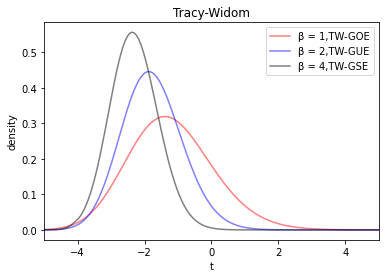

In [8]:
# 本次需求的核心代码，seaborn.distplot()用于绘制直方图、概率密度/核密度曲线、拟合曲线。
## 其中 rn1 是输入数据，是一个list或一个np的narray对象；
## hist=True/False，是否绘制直方图，可以添加hist_kws={}，进行详细设置，不在需求内，不赘述；
## kde=True/False，是否绘制核密度曲线，可以添加kde_kws={},进行详细设置，实际使用时，概率密度曲线常使用拟合曲线表示，不赘述；
## fit=stats.norm，拟合模型，一般是正态分布，norm/stats.norm都可以，可以添加fit_kws={}进行消息设置，
### fit_kws={'color':'拟合曲线颜色','label':'图例说明','linestyle':'曲线样式'}
plt.plot(x,pdf1, color = "red", alpha = 0.5, label=r"β = 1,TW-GOE")
plt.plot(x,pdf2, color = "blue", alpha = 0.5, label=r"β = 2,TW-GUE")
plt.plot(x,pdf4, color = "black", alpha = 0.5, label=r"β = 4,TW-GSE")
plt.title('Tracy-Widom')  
plt.xlim(-5,5)
plt.ylabel("density")
plt.xlabel("t")
plt.legend()
plt.show()

In [18]:
s = pd.Series(h)
print(s.skew())#偏度计算
print(s.kurt())#峰度计算

0.24659513181296647
-0.21398714764912485


In [11]:
len(W_1)

NameError: name 'W_1' is not defined

In [12]:
len(pdf1)

NameError: name 'pdf1' is not defined

In [19]:
pdf1_1=(pdf1-np.mean(pdf1))/np.std(pdf1)
pdf2_2=(pdf2-np.mean(pdf2))/np.std(pdf2)
pdf4_4=(pdf4-np.mean(pdf4))/np.std(pdf4)
#对粗糙度归一

In [16]:
np.std(pdf1_1)

1.0

In [30]:
#run Shapiro-Wilk test
statistics, p = stats.shapiro(W_1)
if (p>0.05):
    print("The distribution is normal")
else:
    print("The distribution is not normal")

The distribution is not normal


In [ ]:
s1 = pd.Series(W)
print(s1.skew(),s1.kurt())

In [111]:
s = pd.Series(W_1)
print(s.skew())#偏度计算
print(s.kurt())#峰度计算

-0.9825325699725345
0.5566129672019797


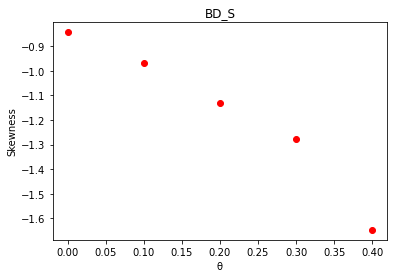

In [46]:
#偏度和峰度随theta的变化
a=[0,0.1,0.2,0.3,0.4]
s=[-0.843,-0.9695,-1.132,-1.278,-1.647]
k=[0.494,0.823,1.167,1.447,2.322]

plt.scatter(a,s,c='r')
plt.title("BD_S")
plt.ylabel("Skewness")
plt.xlabel("θ")
plt.show()

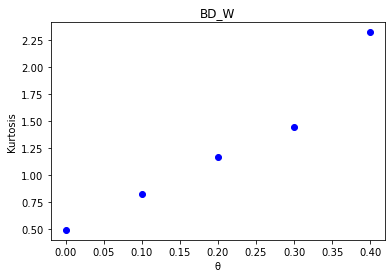

In [47]:

plt.scatter(a,k,c='b')
plt.title("BD_W")
plt.ylabel("Kurtosis")
plt.xlabel("θ")
plt.show()

<ipython-input-53-b9e1ca06b254>:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc9775c2dc0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((pl1,pl2),('original data','G line'))


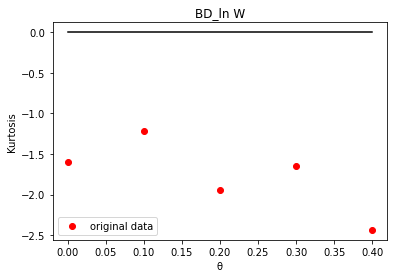

In [53]:
#lnW
lns=[-1.603,-1.212,-1.948,-1.643,-2.435]
lnk=[5.56,1.996,4.268,2.332,5.561]
pl1=plt.scatter(a,lns,c='r')
pl2=plt.plot(a,[0,0,0,0,0],'black')
plt.title("BD_ln W")
plt.ylabel("Kurtosis")
plt.xlabel("θ")
plt.legend((pl1,pl2),('original data','G line'))
plt.show()

<ipython-input-55-50e369db8291>:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fc976c0dd30>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend((pl3,pl4),('original data','G line'))


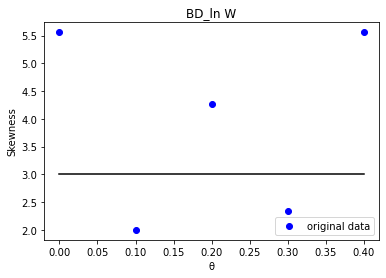

In [55]:

pl3=plt.scatter(a,lnk,c='b')
pl4=plt.plot(a,[3,3,3,3,3],'black')
plt.title("BD_ln W")
plt.ylabel("Skewness")
plt.xlabel("θ")
plt.legend((pl3,pl4),('original data','G line'))
plt.show()

In [3]:
def ffgn(st,T):
    B=2
    a=6
    N=30
    n=np.arange(1,N+1,1,dtype=float)
    u=a*B**(-n)   #u(n)
    r=np.e**(-u)   #r(n)
    W=np.sqrt((12*(1-r**2)*(B**(0.5-st)-B**(st-0.5))*((a*B**(-n))**(1-2*st)))/np.random.gamma(2-2*st))
    uu_noise=np.random.uniform(0,1,[N,T])
    X=np.zeros((N,T))
    et=np.zeros(T)
    b=0
    for nx in range(N):             #main loop for FFGN
        X[nx,0]=(uu_noise[nx,0]-0.5)/(1-r[nx]**2)**0.5
        for t in range(T):
            X[nx,t]=r[nx]*X[nx,t-1]+(uu_noise[nx,t]-0.5)

    for t in range(T):
        for nx in range(N):
            b += X[nx,t]* W[nx]
        et[t]=b
        if et[t]<0:
            et[t]=0
        elif et[t]>=0:
            et[t]=1
        b=0

    return et

In [ ]:
#计算roughness exponent


    